In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# creating a polynomial converter of degree 2
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
# Fitting the polynomial_converter on a dataset for just analysing purpose and not tranforming it
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_feat = polynomial_converter.transform(X)

In [10]:
poly_feat[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [11]:
# Performing the train-test split using polynomial regression

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [18]:
test_predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
MAE = mean_absolute_error(y_test,test_predictions)

In [21]:
MSE = mean_squared_error(y_test,test_predictions)

In [22]:
RMSE = np.sqrt(MSE)

In [23]:
MAE

0.48967980448035603

In [24]:
MSE

0.44175055104034144

In [25]:
RMSE

0.6646431757269019

In [26]:
# create the different order polynomial 
# split  poly feat into train/test
# fit on train
# store/save the rmse for both the train and test
# PLOT the results (error vs poly order)


In [30]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):  # trying 1 to 10 degree
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
  
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [33]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020657,
 0.3517083688399348,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

In [34]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269019,
 0.5803286825231682,
 0.5077742656422755,
 2.575808121294812,
 4.263812349320766,
 1383.4052620420694,
 3733.4225752445113,
 95489.26452707677]

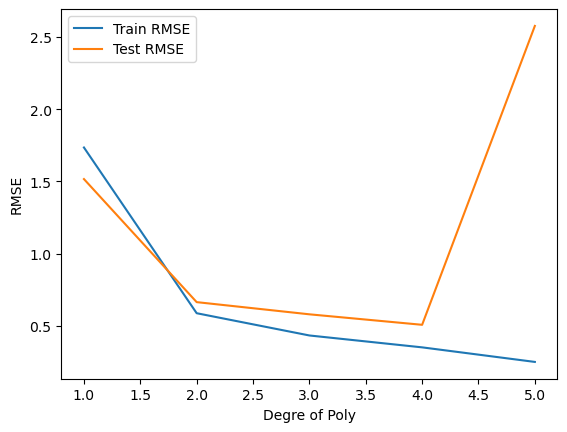

In [39]:
plt.plot(range(1,6),train_rmse_errors[:5],label='Train RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='Test RMSE')
plt.xlabel('Degre of Poly')
plt.ylabel('RMSE')
plt.legend()

In [40]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [41]:
final_model = LinearRegression()

In [42]:
full_converted_data = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_data,y)

LinearRegression()

In [43]:
from joblib import dump,load

In [44]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [45]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [46]:
loaded_converter = load('final_converter.joblib')

In [47]:
loaded_model = load('final_poly_model.joblib')

In [48]:
new_campaign = [[132,22,44]]

In [50]:
transformed_data = loaded_converter.fit_transform(new_campaign)

In [51]:
new_pred = loaded_model.predict(transformed_data)

In [52]:
new_pred

array([14.01195018])